In [3]:
import pandas as pd
import matplotlib.pyplot as plt

business_df = pd.read_json('business_reviews_SF.json',lines=True)
print("Number of Business in the dataset :" + str(business_df.shape[0]))
print(business_df.info())
business_new_df = business_df[['id','name','categories','rating','is_closed','reviews_list']]
print(business_new_df.head())
review_df = business_new_df[['id','reviews_list']]
review_df.head()
business_df.head()

Number of Business in the dataset :950
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 17 columns):
alias            950 non-null object
categories       950 non-null object
coordinates      950 non-null object
display_phone    950 non-null object
distance         950 non-null float64
id               950 non-null object
image_url        950 non-null object
is_closed        950 non-null bool
location         950 non-null object
name             950 non-null object
phone            950 non-null object
price            897 non-null object
rating           950 non-null float64
review_count     950 non-null int64
reviews_list     950 non-null object
transactions     950 non-null object
url              950 non-null object
dtypes: bool(1), float64(2), int64(1), object(13)
memory usage: 119.8+ KB
None
                       id                            name  \
0  f-m7-hyFzkf0HSEeQ2s-9A           Fog Harbor Fish House   
1  HHtpR0RslupSQ99GIIwW5A  

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,phone,price,rating,review_count,reviews_list,transactions,url
0,fog-harbor-fish-house-san-francisco-2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...","{'latitude': 37.809041, 'longitude': -122.410233}",(415) 421-2442,5827.740044,f-m7-hyFzkf0HSEeQ2s-9A,https://s3-media1.fl.yelpcdn.com/bphoto/Lv7tIR...,False,"{'address1': 'Pier 39', 'address2': 'Ste A-202...",Fog Harbor Fish House,+14154212442,$$,4.0,5441,"[{'id': 'eS_qxC-qC8RnJY-FXD3djg', 'url': 'http...",[restaurant_reservation],https://www.yelp.com/biz/fog-harbor-fish-house...
1,marufuku-ramen-sf-san-francisco,"[{'alias': 'ramen', 'title': 'Ramen'}]","{'latitude': 37.785155, 'longitude': -122.432075}",(415) 872-9786,2724.336437,HHtpR0RslupSQ99GIIwW5A,https://s3-media2.fl.yelpcdn.com/bphoto/2lUFO5...,False,"{'address1': '1581 Webster St', 'address2': 'S...",Marufuku Ramen SF,+14158729786,$$,4.5,2322,"[{'id': 'mYK-uNIT2DgiTpq1QO-CZQ', 'url': 'http...",[],https://www.yelp.com/biz/marufuku-ramen-sf-san...
2,the-house-san-francisco,"[{'alias': 'asianfusion', 'title': 'Asian Fusi...","{'latitude': 37.7986203, 'longitude': -122.407...",(415) 986-8612,4911.928932,ZoZjbOYR-apY8XvommlNUA,https://s3-media2.fl.yelpcdn.com/bphoto/UzrNIk...,False,"{'address1': '1230 Grant Ave', 'address2': '',...",The House,+14159868612,$$$,4.5,4628,"[{'id': 'HWzHLIQnF9NMyoMGj39pqw', 'url': 'http...",[restaurant_reservation],https://www.yelp.com/biz/the-house-san-francis...
3,zazie-san-francisco,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 37.765244, 'longitude': -122.4501...",(415) 564-5332,1294.862434,gqVl3RprESEqkIPeJH0yOg,https://s3-media4.fl.yelpcdn.com/bphoto/_JBubn...,False,"{'address1': '941 Cole St', 'address2': '', 'a...",Zazie,+14155645332,$$,4.0,4253,"[{'id': 'e7TBuYMirulnzo-Aio8qcw', 'url': 'http...",[restaurant_reservation],https://www.yelp.com/biz/zazie-san-francisco?a...
4,farmhouse-kitchen-thai-cuisine-san-francisco,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...","{'latitude': 37.7602179, 'longitude': -122.411...",(415) 814-2920,2228.504131,8kck3-K4zYKTJbJko0JlXQ,https://s3-media3.fl.yelpcdn.com/bphoto/AC0JE-...,False,"{'address1': '710 Florida St', 'address2': '',...",Farmhouse Kitchen Thai Cuisine,+14158142920,$$,4.0,1989,"[{'id': 'rRDf36x44uU7cJVD1_CjUQ', 'url': 'http...","[pickup, delivery, restaurant_reservation]",https://www.yelp.com/biz/farmhouse-kitchen-tha...


In [4]:
import json

result_list = []
review_list = []

with open('business_reviews_SF.json', 'r') as infile:
    for line in infile:
        result_dict = dict()
        json_obj = json.loads(line)
        result_dict['business_id'] = json_obj['id']
        result_dict['business_rating'] = json_obj['rating']
        result_dict['is_closed'] = json_obj['is_closed']
        result_dict['name'] = json_obj['name']
        #print (result_dict)
        result_list.append(result_dict)
        #print (json_obj['reviews_list'])
        
        categories_string = ''
        for cat in json_obj['categories']:
            #cat_list.append(cat['title'])
            categories_string = categories_string + cat['title'] + ','
        
        categories_string = categories_string[:-1]
        result_dict['categories'] = categories_string  
        
        for review in json_obj['reviews_list']:
            review_dict = dict()
            review_dict['review_id'] = review['id']
            review_dict['user_id'] = review['user']['id']
            review_dict['business_id'] = json_obj['id']
            review_dict['review_text'] = review['text']
            review_dict['review_rating'] = review['rating']
            review_list.append(review_dict)
            
result_df = pd.DataFrame(result_list)
review_df = pd.DataFrame(review_list)
df_merged = result_df[['name', 'business_id', 'categories', 'is_closed']].merge(review_df, how = 'inner', on= 'business_id')
df_merged

,name,business_id,categories,is_closed,review_id,review_rating,review_text,user_id
0,Fog Harbor Fish House,f-m7-hyFzkf0HSEeQ2s-9A,"Seafood,Bars",False,eS_qxC-qC8RnJY-FXD3djg,5,The restaurant is in a perfect location. You m...,3UxhJ0zdww8ptAESBMwAaQ
1,Fog Harbor Fish House,f-m7-hyFzkf0HSEeQ2s-9A,"Seafood,Bars",False,vmY1p68iTuh04iFm8ovglA,3,My girlfriend and I flew into SFO and decided ...,XoPZFbhk60YaXOlFvfBFIA
2,Fog Harbor Fish House,f-m7-hyFzkf0HSEeQ2s-9A,"Seafood,Bars",False,c-TXm5KzuSO3TrzZ4AAsCA,1,Ambiance is nice but this is another tourist t...,iq9b1xt3PG1rBbjGY4I6AQ
3,Marufuku Ramen SF,HHtpR0RslupSQ99GIIwW5A,Ramen,False,mYK-uNIT2DgiTpq1QO-CZQ,5,This is one of my favorite ramen places in the...,ZDLnBs5w9Lh_j2t9fBLRLA
4,Marufuku Ramen SF,HHtpR0RslupSQ99GIIwW5A,Ramen,False,6qNu34Px7v9FF9FW46F_2Q,4,Glad I went to see what all the hype was.\n\nW...,-YQaFTtjDTG2nKtowceuiQ
5,Marufuku Ramen SF,HHtpR0RslupSQ99GIIwW5A,Ramen,False,HCyvghhf2GlgRvopxuCn7A,4,The ramen broth at Marufuku SF was the highlig...,zNtNVYxpMGPOviQK-YUbEg
6,The House,ZoZjbOYR-apY8XvommlNUA,Asian Fusion,False,HWzHLIQnF9NMyoMGj39pqw,5,Must try their wasabi noodles. Sometimes if sc...,V8Nbny-yDqIeAvR1-kyWcw
7,The House,ZoZjbOYR-apY8XvommlNUA,Asian Fusion,False,clFzi8PZRNeQFdoZIsWqOA,4,A tiny restaurant offering bold flavors. \nTri...,HNpi4ahv9XqxA5-7stqdJA
8,The House,ZoZjbOYR-apY8XvommlNUA,Asian Fusion,False,fuEI4pTInOuKZm81eDwYbQ,4,It's a small spot with good food and pricey. Y...,qHj5lQTK44h27veQkGq0FQ
9,Zazie,gqVl3RprESEqkIPeJH0yOg,"Breakfast & Brunch,French",False,e7TBuYMirulnzo-Aio8qcw,5,Amazing joint!\n\nGreat recommendation that ha...,lC_ELCv9snnlhI4Pc8WTSw


In [5]:
df_merged.to_csv('restaurant_review.csv')

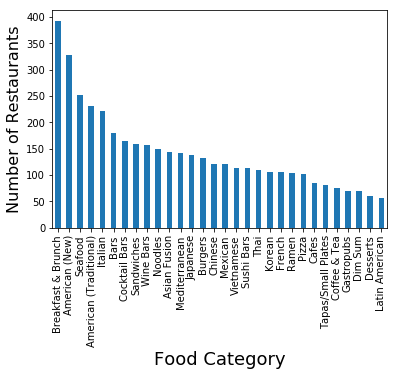

In [158]:
uniq_cat_dict = {}
for i in df_merged.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')
plt.xlabel('Food Category', fontsize=18)
#for i in uniq_cat_series.iteritems():
for i in df_merged.categories:
plt.ylabel('Number of Restaurants', fontsize=16)
plt.show()

In [83]:
#for i in uniq_cat_series.iteritems():
for i in df_merged.categories:
    print(i)

Seafood,Bars
Seafood,Bars
Seafood,Bars
Ramen
Ramen
Ramen
Asian Fusion
Asian Fusion
Asian Fusion
Breakfast & Brunch,French
Breakfast & Brunch,French
Breakfast & Brunch,French
Thai,Comfort Food
Thai,Comfort Food
Thai,Comfort Food
Burmese
Burmese
Burmese
Seafood,Bars,Sandwiches
Seafood,Bars,Sandwiches
Seafood,Bars,Sandwiches
German
German
German
Korean,American (New),Breakfast & Brunch
Korean,American (New),Breakfast & Brunch
Korean,American (New),Breakfast & Brunch
Korean,Barbeque
Korean,Barbeque
Korean,Barbeque
Chinese,Chicken Wings,Noodles
Chinese,Chicken Wings,Noodles
Chinese,Chicken Wings,Noodles
British,Fish & Chips,Seafood
British,Fish & Chips,Seafood
British,Fish & Chips,Seafood
Bars,American (New),Seafood
Bars,American (New),Seafood
Bars,American (New),Seafood
Korean,Soup,Noodles
Korean,Soup,Noodles
Korean,Soup,Noodles
Italian,Bars,Pizza
Italian,Bars,Pizza
Italian,Bars,Pizza
Breakfast & Brunch,Asian Fusion,American (New)
Breakfast & Brunch,Asian Fusion,American (New)
Breakfast & 

Indian
Indian
Indian
Mexican
Mexican
Mexican
Mexican
Mexican
Mexican
Moroccan,Hookah Bars,Mediterranean
Moroccan,Hookah Bars,Mediterranean
Moroccan,Hookah Bars,Mediterranean
Thai,Soup
Thai,Soup
Thai,Soup
Southern,Whiskey Bars,American (New)
Southern,Whiskey Bars,American (New)
Southern,Whiskey Bars,American (New)
Coffee & Tea,Breakfast & Brunch,Sandwiches
Coffee & Tea,Breakfast & Brunch,Sandwiches
Coffee & Tea,Breakfast & Brunch,Sandwiches
Vietnamese,Sandwiches
Vietnamese,Sandwiches
Vietnamese,Sandwiches
Japanese,Sushi Bars
Japanese,Sushi Bars
Japanese,Sushi Bars
Pubs,Burgers
Pubs,Burgers
Pubs,Burgers
Korean
Korean
Korean
Poke,Sushi Bars,Japanese Curry
Poke,Sushi Bars,Japanese Curry
Poke,Sushi Bars,Japanese Curry
Japanese,Sushi Bars
Japanese,Sushi Bars
Japanese,Sushi Bars
Italian,Pizza,Whiskey Bars
Italian,Pizza,Whiskey Bars
Italian,Pizza,Whiskey Bars
Sushi Bars,Japanese
Sushi Bars,Japanese
Sushi Bars,Japanese
Bakeries,Coffee & Tea,Breakfast & Brunch
Bakeries,Coffee & Tea,Breakfast & B

Text(0, 0.5, 'Number of Restaurants')

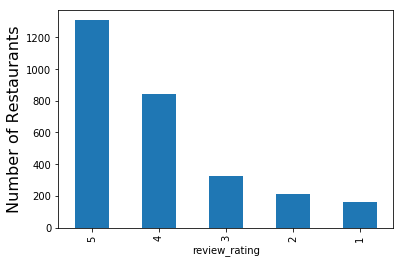

In [159]:
df_rating_groups = df_merged.groupby('review_rating').count()
df_bus_city = df_rating_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')
plt.ylabel('Number of Restaurants', fontsize=16)


In [115]:
user_restaurant_test = df_merged[['user_id','business_id','review_rating']]
#user_restaurant_test = user_restaurant_test.set_index('user_id')


In [116]:
user_restaurant_test.head()

,user_id,business_id,review_rating
0,3UxhJ0zdww8ptAESBMwAaQ,f-m7-hyFzkf0HSEeQ2s-9A,5
1,XoPZFbhk60YaXOlFvfBFIA,f-m7-hyFzkf0HSEeQ2s-9A,3
2,iq9b1xt3PG1rBbjGY4I6AQ,f-m7-hyFzkf0HSEeQ2s-9A,1
3,ZDLnBs5w9Lh_j2t9fBLRLA,HHtpR0RslupSQ99GIIwW5A,5
4,-YQaFTtjDTG2nKtowceuiQ,HHtpR0RslupSQ99GIIwW5A,4


In [117]:
print(user_restaurant_test.iloc[1])
print(user_restaurant_test.iloc[1]['business_id'])
print(user_restaurant_test.iloc[1]['review_rating'])
print(user_restaurant_test.iloc[1]['user_id'])
#user_restaurant_test.iloc[1]['Name']

user_id          XoPZFbhk60YaXOlFvfBFIA
business_id      f-m7-hyFzkf0HSEeQ2s-9A
review_rating                         3
Name: 1, dtype: object
f-m7-hyFzkf0HSEeQ2s-9A
3
XoPZFbhk60YaXOlFvfBFIA


In [134]:
df_sample = pd.DataFrame()
for row in user_restaurant_test.itertuples(index=True):
    #print("User_id "+str(row[1]) + " Business_id " + str(row[2]) + " Rating " + str(row[3]))
    df_sample.at[row[1], row[2]] = row[3]
    

                        f-m7-hyFzkf0HSEeQ2s-9A  HHtpR0RslupSQ99GIIwW5A  \
3UxhJ0zdww8ptAESBMwAaQ                     5.0                     NaN   
XoPZFbhk60YaXOlFvfBFIA                     3.0                     NaN   
iq9b1xt3PG1rBbjGY4I6AQ                     1.0                     NaN   
ZDLnBs5w9Lh_j2t9fBLRLA                     NaN                     5.0   
-YQaFTtjDTG2nKtowceuiQ                     NaN                     4.0   

                        ZoZjbOYR-apY8XvommlNUA  gqVl3RprESEqkIPeJH0yOg  \
3UxhJ0zdww8ptAESBMwAaQ                     NaN                     NaN   
XoPZFbhk60YaXOlFvfBFIA                     NaN                     NaN   
iq9b1xt3PG1rBbjGY4I6AQ                     NaN                     NaN   
ZDLnBs5w9Lh_j2t9fBLRLA                     NaN                     NaN   
-YQaFTtjDTG2nKtowceuiQ                     NaN                     NaN   

                        8kck3-K4zYKTJbJko0JlXQ  eYXwVR4mMAjzkJnm5wneHQ  \
3UxhJ0zdww8ptAESBMwAaQ              

In [138]:
df_sample.to_csv('sample_csv_testing.csv')

In [146]:
restaurant_category = df_merged[['business_id','categories']]

In [150]:
restaurant_category = restaurant_category.set_index('business_id')

In [153]:
X = pd.get_dummies(restaurant_category, prefix=['cat_'],columns=['categories'])

In [154]:
X.head()

,"cat__Afghan,Middle Eastern",cat__American (New),"cat__American (New),Asian Fusion","cat__American (New),Bars","cat__American (New),Brasseries","cat__American (New),Breakfast & Brunch","cat__American (New),Breakfast & Brunch,Bars","cat__American (New),Breakfast & Brunch,Gastropubs","cat__American (New),Brewpubs,Bars","cat__American (New),British,Cocktail Bars",...,"cat__Wine Bars,American (Traditional)","cat__Wine Bars,Beer Bar,American (New)","cat__Wine Bars,Cafes","cat__Wine Bars,Cafes,Beverage Store","cat__Wine Bars,French","cat__Wine Bars,Indian,Breakfast & Brunch","cat__Wine Bars,Italian,Desserts","cat__Wine Bars,Lounges,French","cat__Wine Bars,Mediterranean","cat__Wine Bars,Tapas/Small Plates,Whiskey Bars"
business_id,,,,,,,,,,,,,,,,,,,,,
f-m7-hyFzkf0HSEeQ2s-9A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f-m7-hyFzkf0HSEeQ2s-9A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
f-m7-hyFzkf0HSEeQ2s-9A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HHtpR0RslupSQ99GIIwW5A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HHtpR0RslupSQ99GIIwW5A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
